# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
# Read all the csv files
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')

df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
print(f"The Tesla daraframe has {df_tesla.shape[0]} rows and {df_tesla.shape[1]} columns")


The Tesla daraframe has 124 rows and 3 columns


In [ ]:
print(f"The columns' names are {df_tesla.columns[0]}, {df_tesla.columns[1]}, {df_tesla.columns[2]}")

The columns' names are MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
print("The periodicity is monthly.")

The periodicity is monthly.


### Unemployment Data

In [ ]:
print(f"The unemployment dataframe has {df_unemployment.shape[0]} rows and {df_unemployment.shape[1]} columns.")

The unemployment dataframe has 181 rows and 3 columns.


In [ ]:
print(f"The column names are {df_unemployment.columns[0]}, {df_unemployment.columns[1]}, {df_unemployment.columns[2]}")

The column names are MONTH, UE_BENEFITS_WEB_SEARCH, UNRATE


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100
Largest value for "Unemployemnt Benefits" in Web Search: 14


In [ ]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
print("The periodicity is monthly.")

The periodicity is monthly.


### Bitcoin

What are the shapes of the dataframes?<br>
How many rows and columns?<br>
What are the column names?<br>
Complete the f-string to show the largest/smallest number in the search data column<br>
Try the .describe() function to see some useful descriptive statistics<br>
What is the periodicity of the time series data (daily, weekly, monthly)?<br>
What does a value of 100 in the Google Trend search popularity actually mean?<br>

In [ ]:
print(f"The BTC search dataframe has {df_btc_search.shape[0]} rows and {df_btc_search.shape[1]} columns")

TheBTC search dataframe has 73 rows and 2 columns


In [ ]:
print(f"The columns' names are {[name for  name in df_btc_search.columns]}")

The columns' names are ['MONTH', 'BTC_NEWS_SEARCH']


In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'lowest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.min()}')

largest BTC News Search: 100
lowest BTC News Search: 3


In [ ]:
print("The periodicity is monthly.")

The periodicity is monthly.


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_unemployment.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [ ]:
clean_df_btc_price = df_btc_price.dropna()
clean_df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [ ]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
clean_df_btc_price.DATE = pd.to_datetime(clean_df_btc_price.DATE)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [ ]:
print(type(df_tesla.MONTH[0]))
print(type(df_btc_search.MONTH[0]))
print(type(df_btc_price.DATE[0]))
print(type(df_unemployment.MONTH[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
df_monthly_btc_price = clean_df_btc_price.resample("M", on="DATE").last()
df_monthly_btc_price.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis

In [ ]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

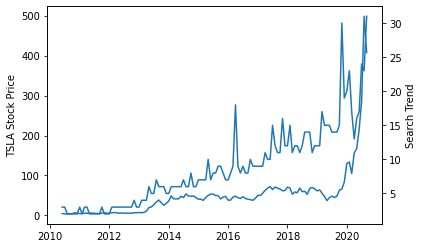

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

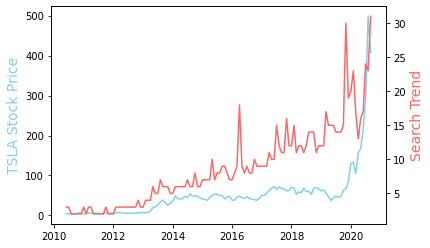

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", fontsize=14, color="skyblue")
ax2.set_ylabel("Search Trend", fontsize=14, color="#ff6666")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="skyblue")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="#ff6666")

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1.set_xlim(left=df_tesla.MONTH.min(), right=df_tesla.MONTH.max())
ax1.set_ylim(df_tesla.TSLA_USD_CLOSE.min(), df_tesla.TSLA_USD_CLOSE.max())

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", fontsize=14, color="skyblue")
ax2.set_ylabel("Search Trend", fontsize=14, color="#ff6666")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="skyblue", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="#ff6666", linewidth=3)

plt.show()

How to add tick formatting for dates on the x-axis. 

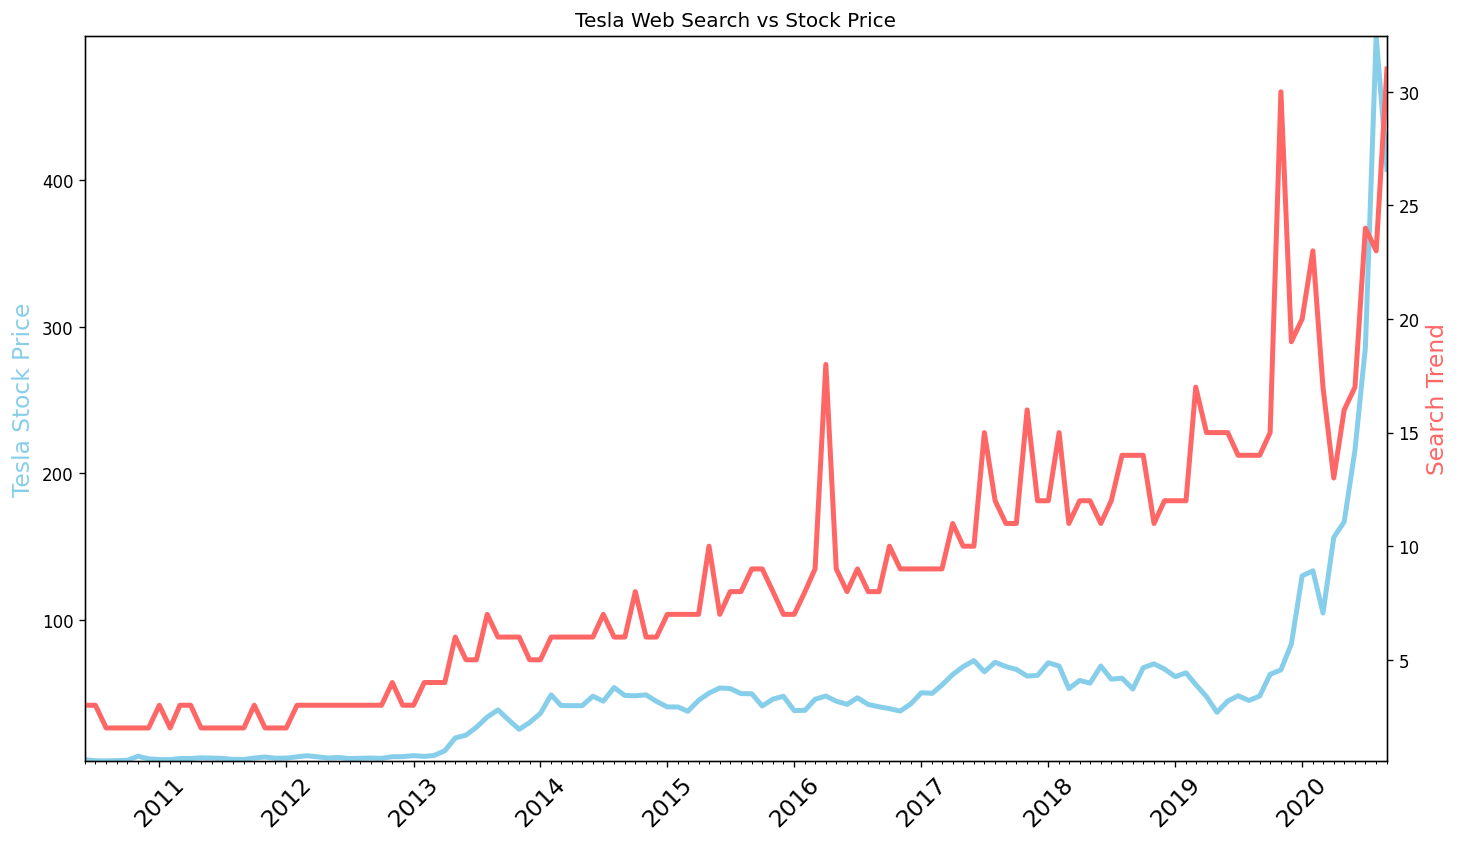

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search vs Stock Price")
plt.xticks(fontsize=14, rotation=45)

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(left=df_tesla.MONTH.min(), right=df_tesla.MONTH.max())
ax1.set_ylim(df_tesla.TSLA_USD_CLOSE.min(), df_tesla.TSLA_USD_CLOSE.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Tesla Stock Price", fontsize=14, color="skyblue")
ax2.set_ylabel("Search Trend", fontsize=14, color="#ff6666")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="skyblue", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="#ff6666", linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

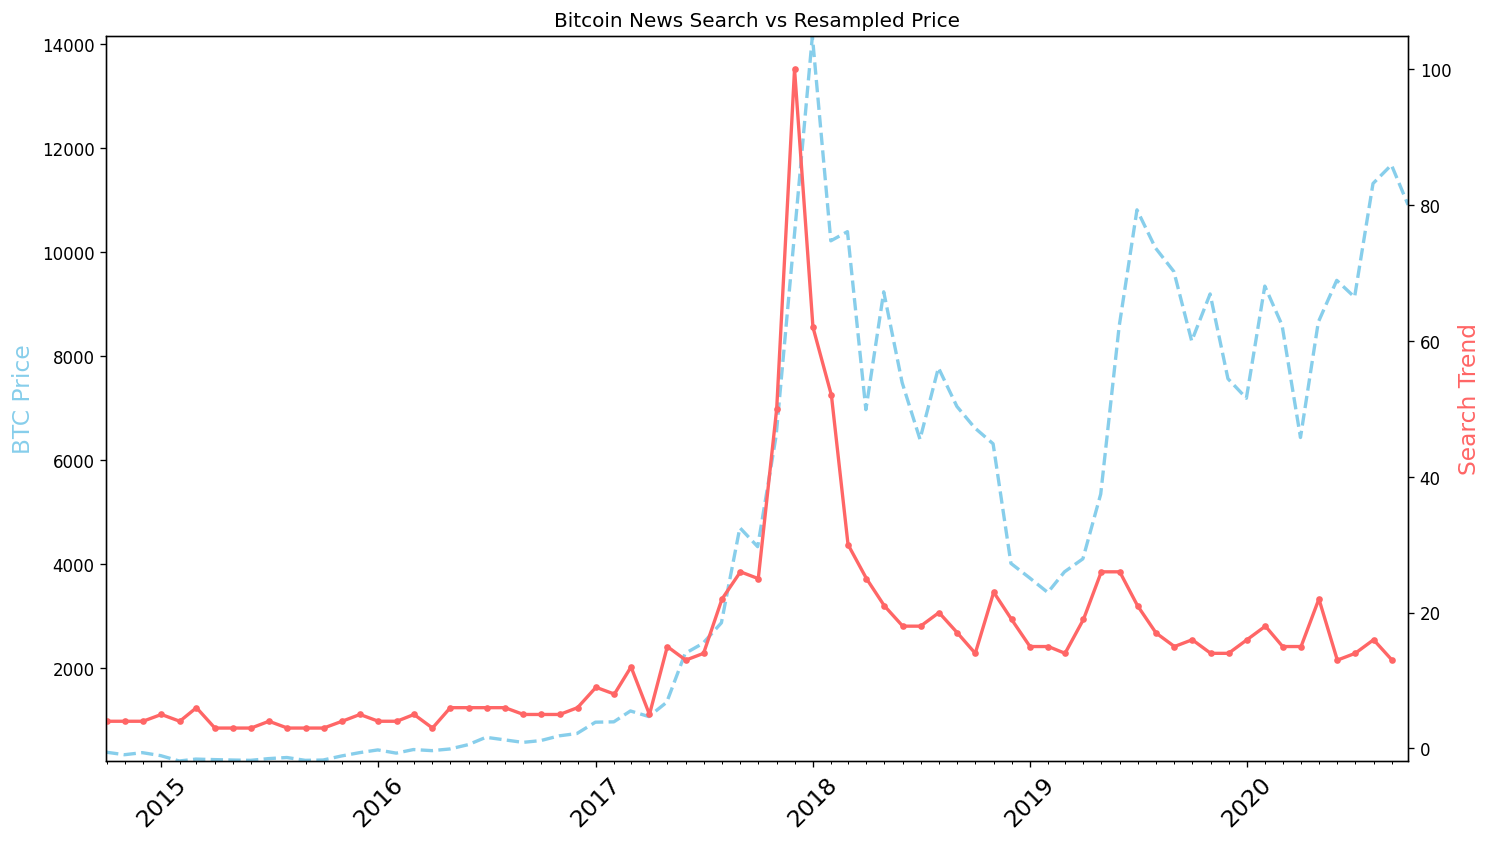

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price")
plt.xticks(fontsize=14, rotation=45)

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(left=df_monthly_btc_price.DATE.min(), right=df_monthly_btc_price.DATE.max())
ax1.set_ylim(df_monthly_btc_price.CLOSE.min(), df_monthly_btc_price.CLOSE.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("BTC Price", fontsize=14, color="skyblue")
ax2.set_ylabel("Search Trend", fontsize=14, color="#ff6666")

ax1.plot(df_monthly_btc_price.DATE, df_monthly_btc_price.CLOSE, color="skyblue", linewidth=2, linestyle="--")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="#ff6666", linewidth=2, marker=".")

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

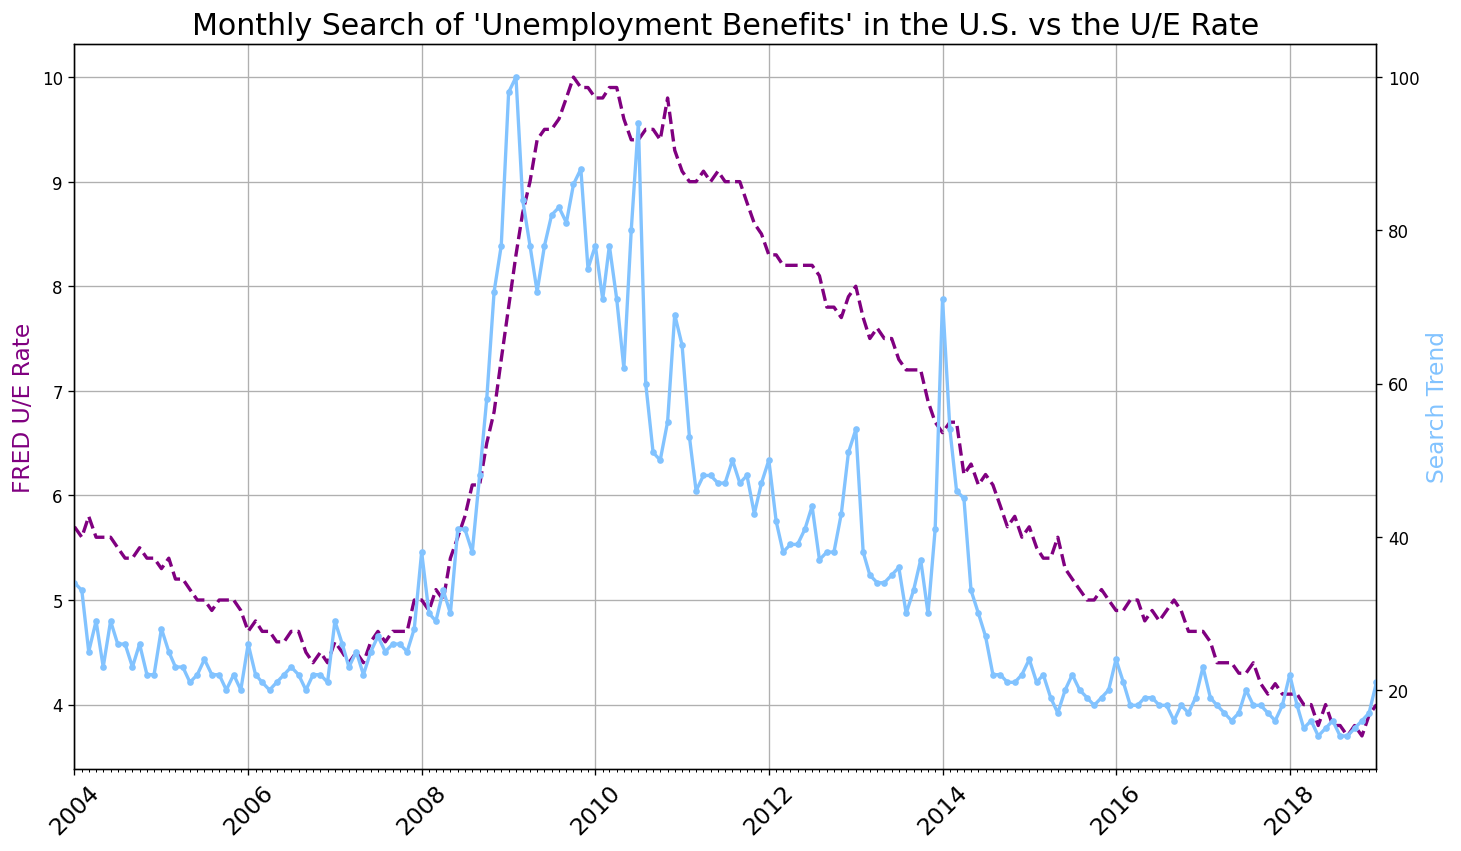

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(b=True, axis="both")
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(left=df_unemployment.MONTH.min(), right=df_unemployment.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="purple")
ax2.set_ylabel("Search Trend", fontsize=14, color="#82c3ff")

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="purple", linewidth=2, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="#82c3ff", linewidth=2, marker=".")

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [6]:
df_unemployment_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

In [8]:
df_unemployment_2020.MONTH = pd.to_datetime(df_unemployment_2020.MONTH)

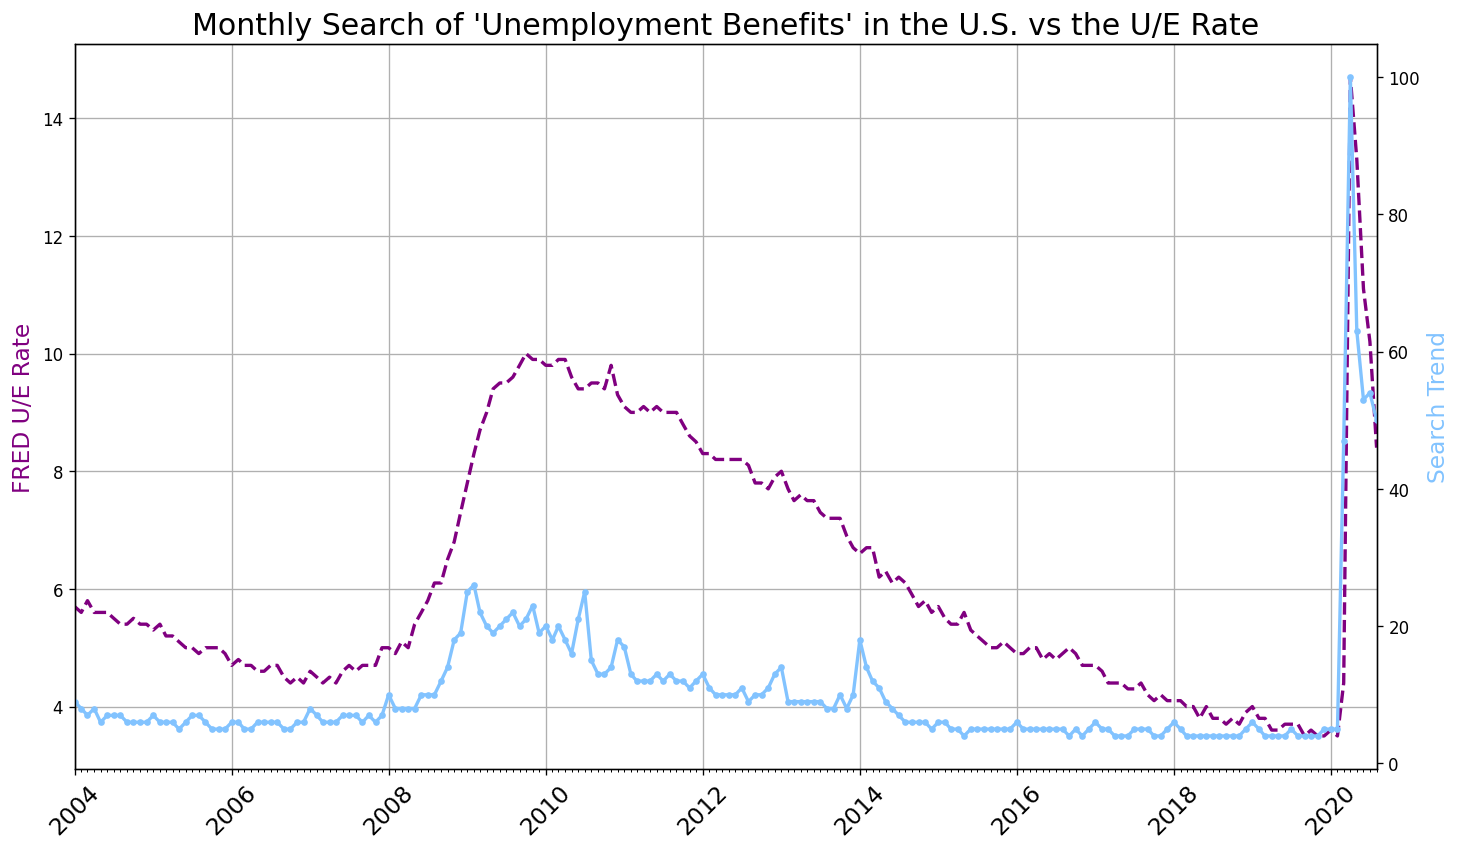

In [9]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(b=True, axis="both")
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(left=df_unemployment_2020.MONTH.min(), right=df_unemployment_2020.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="purple")
ax2.set_ylabel("Search Trend", fontsize=14, color="#82c3ff")

ax1.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UNRATE, color="purple", linewidth=2, linestyle="--")
ax2.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UE_BENEFITS_WEB_SEARCH, color="#82c3ff", linewidth=2, marker=".")

plt.show()